In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import pandas as pd

In [3]:
arq = open ('Desktop/probest/Dados-medicos.csv','r')
arq.readline() #desconsiderar a primeira linha

lista_idade = []
lista_peso = []
lista_carga = []
lista_VO2 = []
num_pacientes = 0

while(1):
    base = arq.readline().split()
    if (base!=[]):
        lista_idade += [int(base[0])]
        lista_peso += [float(base[1])]
        lista_carga += [float(base[2])]
        lista_VO2 += [float(base[3])]
        num_pacientes += 1
    else: 
        arq.close()
        break
        
#CALCULO DAS MÉDIAS:
idade_media = sum(lista_idade)/num_pacientes
peso_media= sum(lista_peso)/num_pacientes
carga_media= sum(lista_carga)/num_pacientes
VO2_media = sum(lista_VO2)/num_pacientes

#CALCULO DAS VARIÂNCIAS
idade_var = 0
peso_var = 0
carga_var = 0
VO2_var = 0

for i in range(num_pacientes):
    idade_var += (lista_idade[i]-idade_media)**2
    peso_var += (lista_peso[i]-peso_media)**2
    carga_var += (lista_carga[i]-carga_media)**2
    VO2_var += (lista_VO2[i]-VO2_media)**2

idade_var /= (num_pacientes-1)
peso_var /= (num_pacientes-1)
carga_var /= (num_pacientes-1)
VO2_var /= (num_pacientes-1)

In [4]:
print("Média idade: ",idade_media)
print("Média peso: ",peso_media)
print("Média carga final: ",carga_media)
print("Média VO2: ",VO2_media)
print("\nVariância idade: ",idade_var)
print("Variância peso: ",peso_var)
print("Variância carga final: ",carga_var)
print("Variância VO2: ",VO2_var)

Média idade:  53.29095563139932
Média peso:  85.92577645051215
Média carga final:  172.27150170648466
Média VO2:  29.394727923153184

Variância idade:  217.45327423543358
Variância peso:  219.01375695425293
Variância carga final:  4913.045984762596
Variância VO2:  110.19225532503248


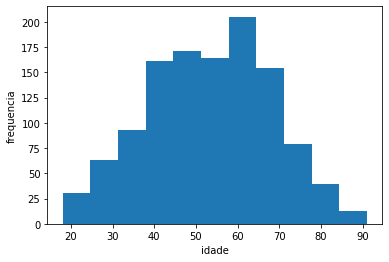

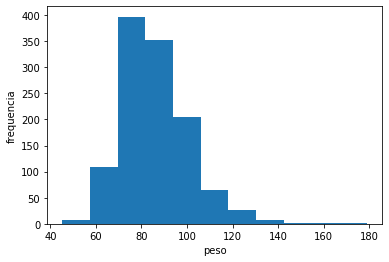

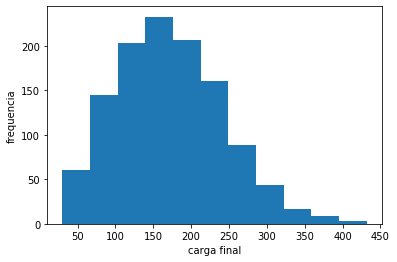

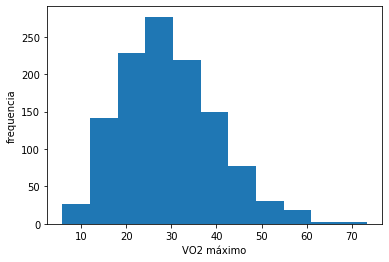

In [5]:
#Histogramas
bins = int(1+3.3*np.log10(num_pacientes))

def histograma(lista_variavel,xlabel):
    plt.hist(lista_variavel,bins=bins)
    plt.ylabel('frequencia')
    plt.xlabel(xlabel)
    plt.show()

histograma(lista_idade,'idade')
histograma(lista_peso,'peso')
histograma(lista_carga,'carga final')
histograma(lista_VO2,'VO2 máximo')

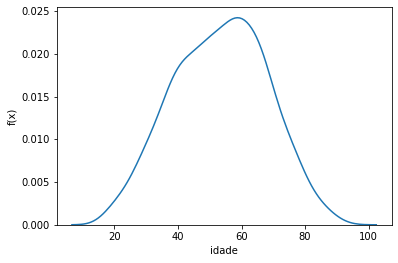

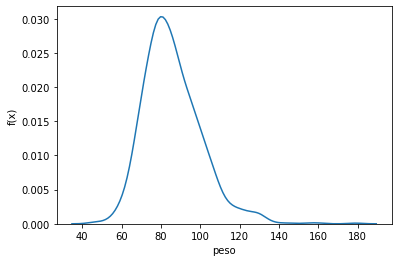

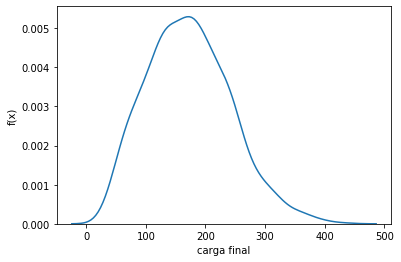

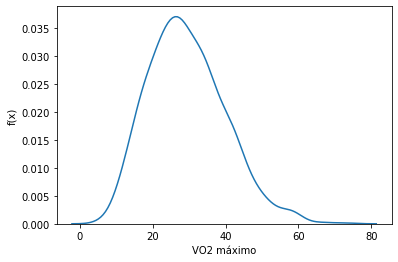

In [6]:
#Função de densidade f(x)

def f(lista_variavel,xlabel):
    sns.kdeplot(lista_variavel)
    plt.ylabel('f(x)')
    plt.xlabel(xlabel)
    plt.show()

f(lista_idade,'idade')
f(lista_peso,'peso')
f(lista_carga,'carga final')
f(lista_VO2,'VO2 máximo')

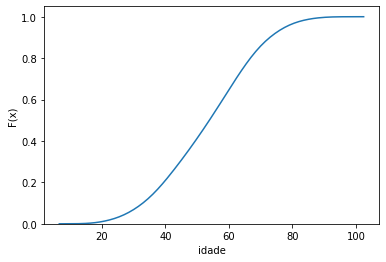

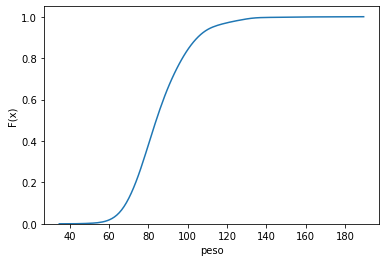

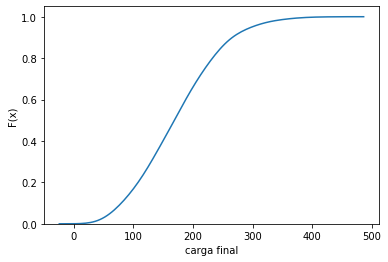

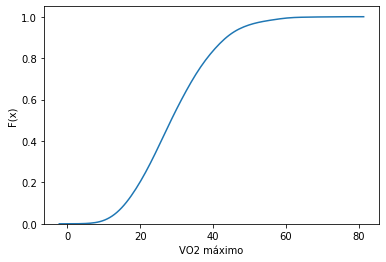

In [7]:
#Função distribuição acumulada F(x)

def F(lista_variavel,xlabel):
    sns.kdeplot(lista_variavel,cumulative=True)
    plt.ylabel('F(x)')
    plt.xlabel(xlabel)
    plt.show()

F(lista_idade,'idade')
F(lista_peso,'peso')
F(lista_carga,'carga final')
F(lista_VO2,'VO2 máximo')

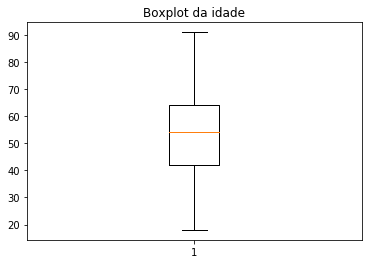

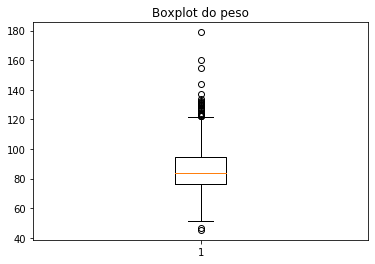

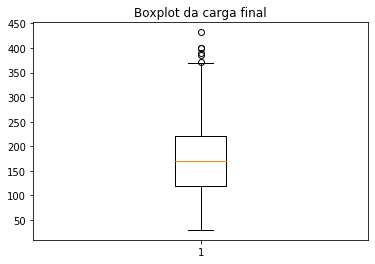

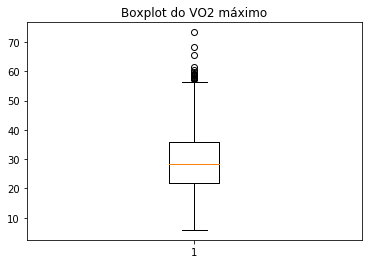

In [8]:
#Boxplot

def boxplot(lista_variavel,title):
    plt.boxplot(lista_variavel)
    plt.title(title)
    plt.show()

boxplot(lista_idade,'Boxplot da idade')
boxplot(lista_peso,'Boxplot do peso')
boxplot(lista_carga,'Boxplot da carga final')
boxplot(lista_VO2,'Boxplot do VO2 máximo')

IDADE:
Lambda exponencial:  0.018764910258257682
Mi da gaussiana:  53.29095563139932 
Sigma quadrado da gaussiana:  217.45327423543358
Mi da lognormal:  3.9325098194868735 
Sigma quadrado da lognormal:  0.09363319557934364
Constante da weibull:  4.089481828645864 
Scale da weibull:  58.78289005707875


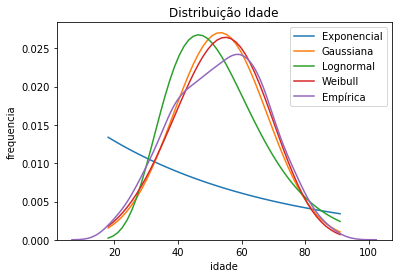

In [9]:
#Distribuição Idade
x = np.linspace(min(lista_idade),max(lista_idade))

lambda_expIDADE = num_pacientes/sum(lista_idade) 
exponencial = lambda_expIDADE*np.exp(-lambda_expIDADE*x)

gaussiana =(1/(2*np.pi*idade_var)**(1/2))* np.exp((-1/2)*((x-idade_media)**2)/idade_var)

mi_lognormIDADE=sum(np.log(lista_idade))/num_pacientes
sigma2_lognormIDADE=sum((np.log(lista_idade)-mi_lognormIDADE)**2)/num_pacientes
lognormal= (1/(x*((2*np.pi*sigma2_lognormIDADE)**(1/2))))*np.exp(-((np.log(x)-mi_lognormIDADE)**2)/(2*sigma2_lognormIDADE))

weibull_paramsIDADE = st.weibull_min.fit(lista_idade,floc=0)
weibull = st.weibull_min.pdf(x, weibull_paramsIDADE[0], scale=weibull_paramsIDADE[2])

print('IDADE:')
print('Lambda exponencial: ',lambda_expIDADE)
print('Mi da gaussiana: ',idade_media,'\nSigma quadrado da gaussiana: ',idade_var)
print('Mi da lognormal: ',mi_lognormIDADE,'\nSigma quadrado da lognormal: ',sigma2_lognormIDADE)
print("Constante da weibull: ",weibull_paramsIDADE[0],'\nScale da weibull: ',weibull_paramsIDADE[2])

plt.plot(x,exponencial,label ='Exponencial')
plt.plot(x,gaussiana,label='Gaussiana')
plt.plot(x,lognormal,label="Lognormal")
plt.plot(x,weibull,label="Weibull")
sns.kdeplot(lista_idade,label='Empírica')
plt.title('Distribuição Idade')
plt.ylabel('frequencia')
plt.xlabel('idade')
plt.legend()
plt.show()  

PESO:
Lambda exponencial:  0.01163795127968308
Mi da gaussiana:  85.92577645051215 
Sigma quadrado da gaussiana:  219.01375695425293
Mi da lognormal:  4.439451920143029 
Sigma quadrado da lognormal:  0.02758699710575287
Constante da weibull:  5.408013188534343 
Scale da weibull:  92.24080850317551


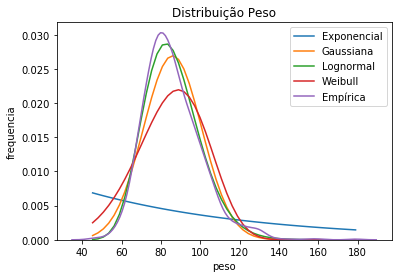

In [10]:
#Distribuição Peso
x = np.linspace(min(lista_peso),max(lista_peso))

lambda_expPESO = num_pacientes/sum(lista_peso) 
exponencial = lambda_expPESO*np.exp(-lambda_expPESO*x)

gaussiana =(1/(2*np.pi*peso_var)**(1/2))* np.exp((-1/2)*((x-peso_media)**2)/peso_var)

mi_lognormPESO=sum(np.log(lista_peso))/num_pacientes
sigma2_lognormPESO=sum((np.log(lista_peso)-mi_lognormPESO)**2)/num_pacientes
lognormal= (1/(x*((2*np.pi*sigma2_lognormPESO)**(1/2))))*np.exp(-((np.log(x)-mi_lognormPESO)**2)/(2*sigma2_lognormPESO))

weibull_paramsPESO = st.weibull_min.fit(lista_peso,floc=0)
weibull = st.weibull_min.pdf(x, weibull_paramsPESO[0], scale=weibull_paramsPESO[2])

print('PESO:')
print('Lambda exponencial: ',lambda_expPESO)
print('Mi da gaussiana: ',peso_media,'\nSigma quadrado da gaussiana: ',peso_var)
print('Mi da lognormal: ',mi_lognormPESO,'\nSigma quadrado da lognormal: ',sigma2_lognormPESO)
print("Constante da weibull: ",weibull_paramsPESO[0],'\nScale da weibull: ',weibull_paramsPESO[2])

plt.plot(x,exponencial,label ='Exponencial')
plt.plot(x,gaussiana,label='Gaussiana')
plt.plot(x,lognormal,label="Lognormal")
plt.plot(x,weibull,label="Weibull")
sns.kdeplot(lista_peso,label='Empírica')
plt.title('Distribuição Peso')
plt.ylabel('frequencia')
plt.xlabel('peso')
plt.legend()
plt.show()

CARGA:
Lambda exponencial:  0.005804790636258545
Mi da gaussiana:  172.27150170648466 
Sigma quadrado da gaussiana:  4913.045984762596
Mi da lognormal:  5.054654405850987 
Sigma quadrado da lognormal:  0.21033685748548323
Constante da weibull:  2.6469810001574725 
Scale da weibull:  194.0388415799269


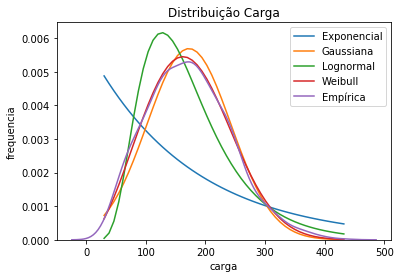

In [11]:
#Distribuição Carga final
x = np.linspace(min(lista_carga),max(lista_carga))

lambda_expCARGA = num_pacientes/sum(lista_carga) 
exponencial = lambda_expCARGA*np.exp(-lambda_expCARGA*x)

gaussiana =(1/(2*np.pi*carga_var)**(1/2))* np.exp((-1/2)*((x-carga_media)**2)/carga_var)

mi_lognormCARGA=sum(np.log(lista_carga))/num_pacientes
sigma2_lognormCARGA=sum((np.log(lista_carga)-mi_lognormCARGA)**2)/num_pacientes
lognormal= (1/(x*((2*np.pi*sigma2_lognormCARGA)**(1/2))))*np.exp(-((np.log(x)-mi_lognormCARGA)**2)/(2*sigma2_lognormCARGA))

weibull_paramsCARGA = st.weibull_min.fit(lista_carga,floc=0)
weibull = st.weibull_min.pdf(x, weibull_paramsCARGA[0], scale=weibull_paramsCARGA[2])

print('CARGA:')
print('Lambda exponencial: ',lambda_expCARGA)
print('Mi da gaussiana: ',carga_media,'\nSigma quadrado da gaussiana: ',carga_var)
print('Mi da lognormal: ',mi_lognormCARGA,'\nSigma quadrado da lognormal: ',sigma2_lognormCARGA)
print("Constante da weibull: ",weibull_paramsCARGA[0],'\nScale da weibull: ',weibull_paramsCARGA[2])

plt.plot(x,exponencial,label ='Exponencial')
plt.plot(x,gaussiana,label='Gaussiana')
plt.plot(x,lognormal,label="Lognormal")
plt.plot(x,weibull,label="Weibull")
sns.kdeplot(lista_carga,label='Empírica')
plt.title('Distribuição Carga')
plt.ylabel('frequencia')
plt.xlabel('carga')
plt.legend()
plt.show()

VO2 máximo:
Lambda exponencial:  0.03401970593551014
Mi da gaussiana:  29.394727923153184 
Sigma quadrado da gaussiana:  110.19225532503248
Mi da lognormal:  3.3132400746591126 
Sigma quadrado da lognormal:  0.14364411960908477
Constante da weibull:  2.9978221690896216 
Scale da weibull:  32.9274599599628


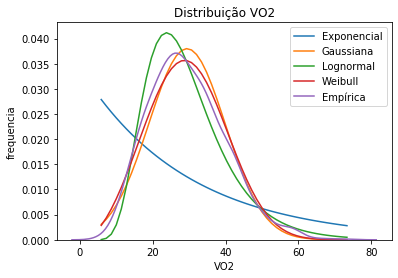

In [12]:
#Distribuição VO2 máximo
x = np.linspace(min(lista_VO2),max(lista_VO2))

lambda_expVO2 = num_pacientes/sum(lista_VO2) 
exponencial = lambda_expVO2*np.exp(-lambda_expVO2*x)

gaussiana =(1/(2*np.pi*VO2_var)**(1/2))* np.exp((-1/2)*((x-VO2_media)**2)/VO2_var)

mi_lognormVO2=sum(np.log(lista_VO2))/num_pacientes
sigma2_lognormVO2=sum((np.log(lista_VO2)-mi_lognormVO2)**2)/num_pacientes
lognormal= (1/(x*((2*np.pi*sigma2_lognormVO2)**(1/2))))*np.exp(-((np.log(x)-mi_lognormVO2)**2)/(2*sigma2_lognormVO2))

weibull_paramsVO2 = st.weibull_min.fit(lista_VO2,floc=0)
weibull = st.weibull_min.pdf(x, weibull_paramsVO2[0], scale=weibull_paramsVO2[2])

print('VO2 máximo:')
print('Lambda exponencial: ',lambda_expVO2)
print('Mi da gaussiana: ',VO2_media,'\nSigma quadrado da gaussiana: ',VO2_var)
print('Mi da lognormal: ',mi_lognormVO2,'\nSigma quadrado da lognormal: ',sigma2_lognormVO2)
print("Constante da weibull: ",weibull_paramsVO2[0],'\nScale da weibull: ',weibull_paramsVO2[2])

plt.plot(x,exponencial,label ='Exponencial')
plt.plot(x,gaussiana,label='Gaussiana')
plt.plot(x,lognormal,label="Lognormal")
plt.plot(x,weibull,label="Weibull")
sns.kdeplot(lista_VO2,label='Empírica')
plt.title('Distribuição VO2')
plt.ylabel('frequencia')
plt.xlabel('VO2')
plt.legend()
plt.show()

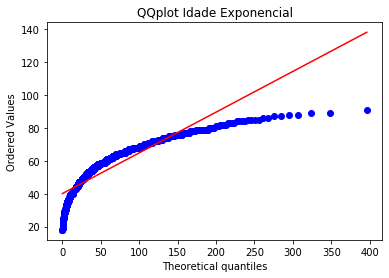

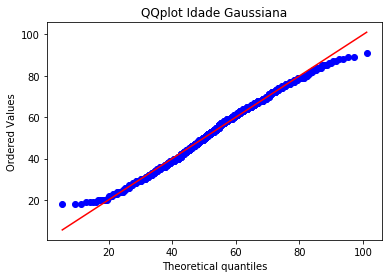

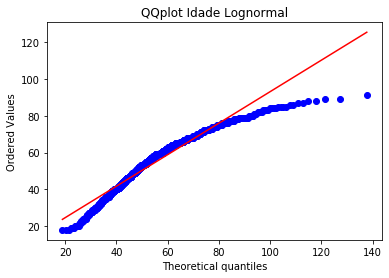

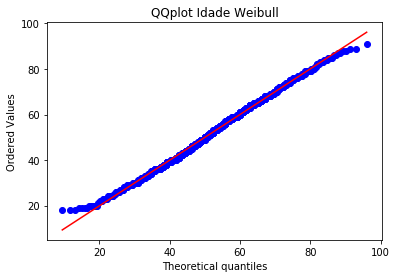

In [13]:
#QQplot Idade

st.probplot(lista_idade,dist=st.expon(scale=1. / lambda_expIDADE),plot=plt)
plt.title('QQplot Idade Exponencial')
plt.show()

st.probplot(lista_idade,dist=st.norm(loc=idade_media,scale=idade_var**(1/2)),plot=plt)
plt.title('QQplot Idade Gaussiana')
plt.show()

st.probplot(lista_idade,dist=st.lognorm(s=sigma2_lognormIDADE**(1/2),scale=np.exp(mi_lognormIDADE)),plot=plt)
plt.title('QQplot Idade Lognormal')
plt.show()

st.probplot(lista_idade,dist=st.weibull_min,sparams=weibull_paramsIDADE,plot=plt)
plt.title('QQplot Idade Weibull')
plt.show()

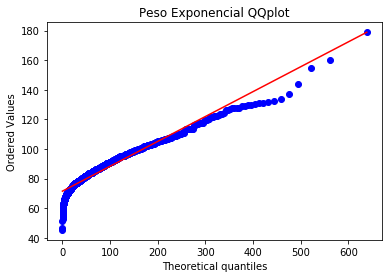

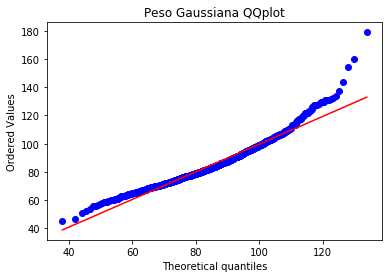

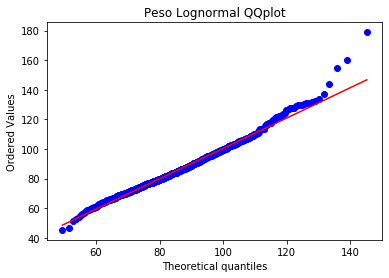

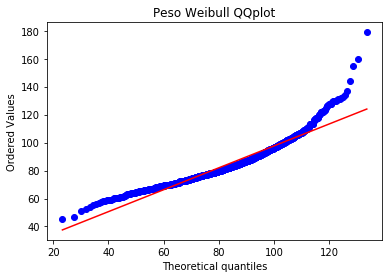

In [14]:
#QQplot Peso

st.probplot(lista_peso,dist=st.expon(scale=1. / lambda_expPESO),plot=plt)
plt.title('Peso Exponencial QQplot')
plt.show()

st.probplot(lista_peso,dist=st.norm(loc=peso_media,scale=peso_var**(1/2)),plot=plt)
plt.title('Peso Gaussiana QQplot')
plt.show()

st.probplot(lista_peso,dist=st.lognorm(s=sigma2_lognormPESO**(1/2),scale=np.exp(mi_lognormPESO)),plot=plt)
plt.title('Peso Lognormal QQplot')
plt.show()

st.probplot(lista_peso,dist=st.weibull_min,sparams=weibull_paramsPESO,plot=plt)
plt.title('Peso Weibull QQplot')
plt.show()

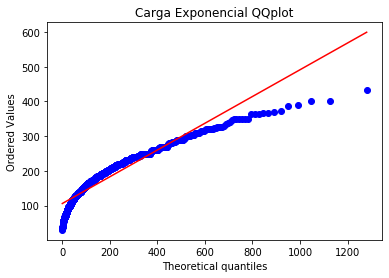

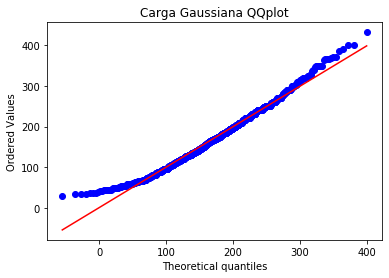

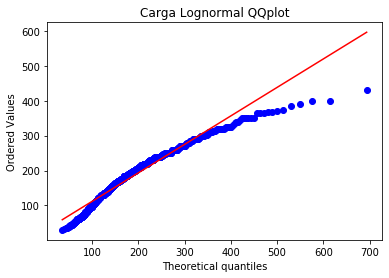

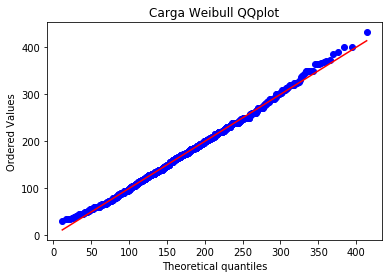

In [15]:
#QQplot Carga final

st.probplot(lista_carga,dist=st.expon(scale=1. / lambda_expCARGA),plot=plt)
plt.title('Carga Exponencial QQplot')
plt.show()

st.probplot(lista_carga,dist=st.norm(loc=carga_media,scale=carga_var**(1/2)),plot=plt)
plt.title('Carga Gaussiana QQplot')
plt.show()

st.probplot(lista_carga,dist=st.lognorm(s=sigma2_lognormCARGA**(1/2),scale=np.exp(mi_lognormCARGA)),plot=plt)
plt.title('Carga Lognormal QQplot')
plt.show()

st.probplot(lista_carga,dist=st.weibull_min,sparams=weibull_paramsCARGA,plot=plt)
plt.title('Carga Weibull QQplot')
plt.show()

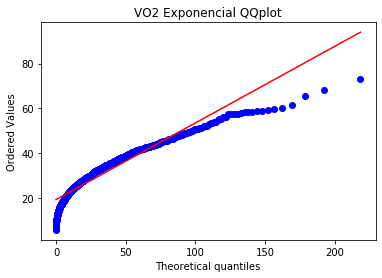

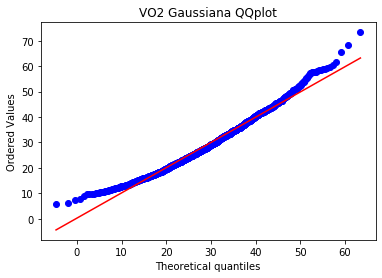

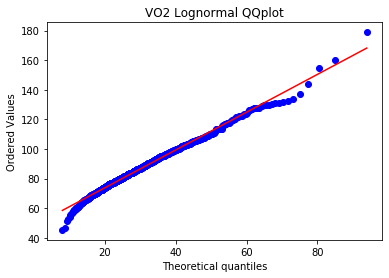

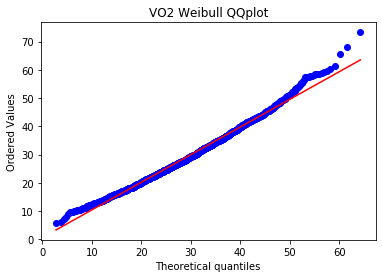

In [16]:
#QQplot VO2 máximo

st.probplot(lista_VO2,dist=st.expon(scale=1./lambda_expVO2),plot=plt)
plt.title('VO2 Exponencial QQplot')
plt.show()

st.probplot(lista_VO2,dist=st.norm(loc=VO2_media,scale=VO2_var**(1/2)),plot=plt)
plt.title('VO2 Gaussiana QQplot')
plt.show()

st.probplot(lista_peso,dist=st.lognorm(s=sigma2_lognormVO2**(1/2),scale=np.exp(mi_lognormVO2)),plot=plt)
plt.title('VO2 Lognormal QQplot')
plt.show()

st.probplot(lista_VO2,dist=st.weibull_min,sparams=weibull_paramsVO2,plot=plt)
plt.title('VO2 Weibull QQplot')
plt.show()

In [17]:
#teste de hipótese:teste Komolgorov-Smirnov

def testeKS(lista_variavel):
    testeKS_exponencial = st.kstest(lista_variavel, 'expon',st.expon.fit(lista_variavel,floc=0))
    testeKS_gaussiana = st.kstest(lista_variavel, 'norm',st.norm.fit(lista_variavel))
    testeKS_lognormal = st.kstest(lista_variavel ,'lognorm',st.lognorm.fit(lista_variavel, floc=0))
    testeKS_weibull = st.kstest(lista_variavel, 'weibull_min',st.weibull_min.fit(lista_variavel,floc=0))
    print('Exponencial: ',testeKS_exponencial)
    print('Gaussiana:   ',testeKS_gaussiana)
    print('Lognormal:   ',testeKS_lognormal)
    print('Weibull:     ',testeKS_weibull,'\n')

print('IDADE:')
testeKS(lista_idade)
print('PESO:')
testeKS(lista_peso)
print('CARGA FINAL:')
testeKS(lista_carga)
print('VO2 MÁXIMO:')
testeKS(lista_VO2)

IDADE:
Exponencial:  KstestResult(statistic=0.372755615059967, pvalue=1.1092520093640775e-146)
Gaussiana:    KstestResult(statistic=0.04408368872194113, pvalue=0.02039175142101984)
Lognormal:    KstestResult(statistic=0.084730460447627, pvalue=9.073029891408715e-08)
Weibull:      KstestResult(statistic=0.033037815723893305, pvalue=0.15145170475997996) 

PESO:
Exponencial:  KstestResult(statistic=0.4954410013455397, pvalue=3.358574509201242e-266)
Gaussiana:    KstestResult(statistic=0.06661818817785059, pvalue=5.75842350736874e-05)
Lognormal:    KstestResult(statistic=0.032285259002662436, pvalue=0.17003957723540433)
Weibull:      KstestResult(statistic=0.1032173331741221, pvalue=2.5226220819374233e-11) 

CARGA FINAL:
Exponencial:  KstestResult(statistic=0.28651634266099946, pvalue=1.1723966939662301e-85)
Gaussiana:    KstestResult(statistic=0.039233911356943985, pvalue=0.05277656069132966)
Lognormal:    KstestResult(statistic=0.08035970386976421, pvalue=4.962162909726044e-07)
Weibull: 

Coeficiente de correlação amostral entre VO2 máximo e idade :  -0.6300720192503428
Coeficiente de correlação amostral entre VO2 máximo e peso :  -0.17440061829630793
Coeficiente de correlação amostral entre VO2 máximo e carga :  0.8783256094059618


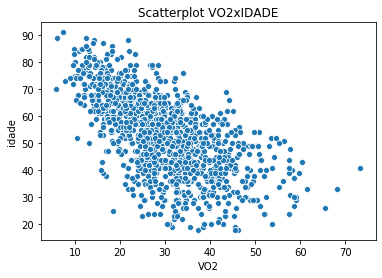

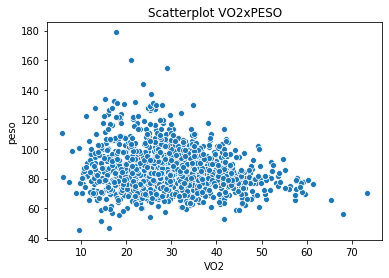

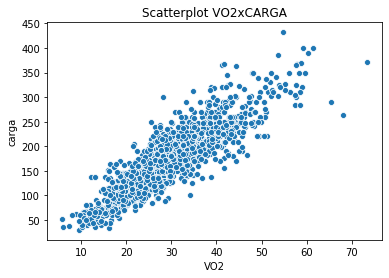

In [18]:
#análise de dependência entre as variáveis

# coeficiente de correlação amostral de Pearson: r = Cov(x,y)/DP(x)*DP(y)
def r(variavel,lista_variavel,variavel_media,variavel_var):
    cov=0
    for i in range(num_pacientes):
        cov += (lista_variavel[i]-variavel_media)*(lista_VO2[i]-VO2_media)
    cov/=(num_pacientes-1)
    r = cov/((variavel_var*VO2_var)**(1/2))
    print('Coeficiente de correlação amostral entre VO2 máximo e',variavel,': ',r)
    
def scatterplot(variavel,lista_variavel):
    sns.scatterplot(lista_VO2,lista_variavel)
    plt.title('Scatterplot VO2x'+variavel.upper())
    plt.ylabel(variavel)
    plt.xlabel('VO2')
    plt.show()
    
r('idade',lista_idade,idade_media,idade_var)
r('peso',lista_peso,peso_media,peso_var)
r('carga',lista_carga,carga_media,carga_var)
scatterplot('idade',lista_idade)
scatterplot('peso',lista_peso)
scatterplot('carga',lista_carga)

In [23]:
#Inferência Bayesiana

hypothesis =[]
prior = []
likelihoodA=[] #A:VO2 menor que 35
likelihoodB=[] #B:VO2 maior ou igual a 35
bayes_numA =[]
bayes_numB =[] 
posteriorA =[]
posteriorB =[]
inf=0
sup=100

for k in range(5):
    hypothesis += [(inf,sup)]
    contador_prior = 0
    contador_likelihoodA = 0
    contador_likelihoodB = 0
    for i in range(num_pacientes):
        if (lista_carga[i]>=inf and lista_carga[i]<sup):
            contador_prior += 1
            if (lista_VO2[i]<35):
                contador_likelihoodA +=1
            else:
                contador_likelihoodB +=1

    prior.append(contador_prior/num_pacientes)
    likelihoodA.append(contador_likelihoodA/contador_prior)
    likelihoodB.append(contador_likelihoodB/contador_prior)
    inf+=100
    sup+=100

for i in range(5):
    bayes_numA.append(prior[i]*likelihoodA[i])
    bayes_numB.append(prior[i]*likelihoodB[i])
for i in range(5):
    posteriorA.append(bayes_numA[i]/sum(bayes_numA))
    posteriorB.append(bayes_numB[i]/sum(bayes_numB))

hypothesis.append('total')
prior.append(sum(prior))
likelihoodA.append('---')
likelihoodB.append('---')
bayes_numA.append(sum(bayes_numA))
bayes_numB.append(sum(bayes_numB))
posteriorA.append(sum(posteriorA))
posteriorB.append(sum(posteriorB))
    
print('Inferência Bayesiana: VO2 < 35')   
print(pd.DataFrame({"hypothesis":hypothesis,
                    "prior":prior,
                    "likelihood" : likelihoodA,
                    "Bayes Num":bayes_numA,
                    "Posterior":posteriorA}))

print('\nInferência Bayesiana: VO2 >= 35') 
print(pd.DataFrame({"hypothesis":hypothesis,
                    "prior":prior,
                    "likelihood" : likelihoodB,
                    "Bayes Num":bayes_numB,
                    "Posterior":posteriorB}))

Inferência Bayesiana: VO2 < 35
   hypothesis     prior likelihood  Bayes Num  Posterior
0    (0, 100)  0.162116          1   0.162116   0.224586
1  (100, 200)  0.497440   0.909091   0.452218   0.626478
2  (200, 300)  0.290956   0.363636   0.105802   0.146572
3  (300, 400)  0.046928  0.0363636   0.001706   0.002364
4  (400, 500)  0.002560          0   0.000000   0.000000
5       total  1.000000        ---   0.721843   1.000000

Inferência Bayesiana: VO2 >= 35
   hypothesis     prior likelihood  Bayes Num  Posterior
0    (0, 100)  0.162116          0   0.000000   0.000000
1  (100, 200)  0.497440  0.0909091   0.045222   0.162577
2  (200, 300)  0.290956   0.636364   0.185154   0.665644
3  (300, 400)  0.046928   0.963636   0.045222   0.162577
4  (400, 500)  0.002560          1   0.002560   0.009202
5       total  1.000000        ---   0.278157   1.000000
